<a href="https://colab.research.google.com/github/kaansen97/Image-Classification/blob/main/INTEL_IMAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [9]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [12]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['/content/drive/MyDrive/Datasetler/INTEL IMAGES/seg_train', '/content/drive/MyDrive/Datasetler/INTEL IMAGES/seg_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [13]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading /content/drive/MyDrive/Datasetler/INTEL IMAGES/seg_train


100%|██████████| 2274/2274 [00:30<00:00, 74.80it/s] 


Loading /content/drive/MyDrive/Datasetler/INTEL IMAGES/seg_test


100%|██████████| 248/248 [00:02<00:00, 89.45it/s] 


In [14]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [15]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 14034
Number of testing examples: 2130
Each image is of size: (150, 150)


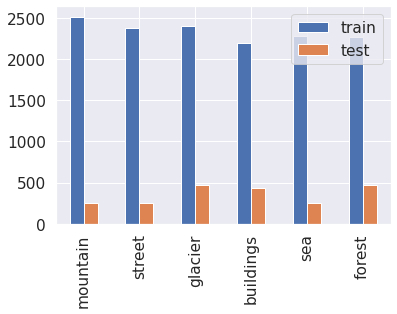

In [16]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

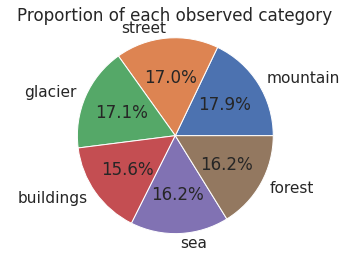

In [17]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

##Scale the Data

In [18]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [19]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

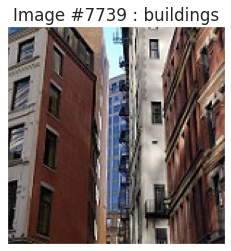

In [20]:
display_random_image(class_names, train_images, train_labels)

##Create Simple Model

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [22]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
88/88 [==============================] - 255s 3s/step - loss: 1.3035 - accuracy: 0.5209 - val_loss: 0.9094 - val_accuracy: 0.6701
Epoch 2/20
88/88 [==============================] - 250s 3s/step - loss: 0.7865 - accuracy: 0.7052 - val_loss: 0.7078 - val_accuracy: 0.7442
Epoch 3/20
88/88 [==============================] - 246s 3s/step - loss: 0.6198 - accuracy: 0.7755 - val_loss: 0.6656 - val_accuracy: 0.7674
Epoch 4/20
88/88 [==============================] - 247s 3s/step - loss: 0.5073 - accuracy: 0.8165 - val_loss: 0.6484 - val_accuracy: 0.7802
Epoch 5/20
88/88 [==============================] - 254s 3s/step - loss: 0.4064 - accuracy: 0.8570 - val_loss: 0.6793 - val_accuracy: 0.7691
Epoch 6/20
88/88 [==============================] - 252s 3s/step - loss: 0.2972 - accuracy: 0.9005 - val_loss: 0.7967 - val_accuracy: 0.7517
Epoch 7/20
88/88 [==============================] - 259s 3s/step - loss: 0.2306 - accuracy: 0.9265 - val_loss: 0.8778 - val_accuracy: 0.7310
Epoch 8/20
88

In [24]:
model.save("/content/drive/MyDrive/Trained Models/Intel_Court_Model.h5py")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Trained Models/Intel_Court_Model.h5py/assets
